<a href="https://colab.research.google.com/github/Joykareko/Data-Science-Projects/blob/main/Stock_Market_Prediction_and_Forecasting_using_LSTM_ML_Project_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Long Short Term Memory Model (LSTM) to forecast stock prices

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
stock_data = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
stock_data.rename(columns = {'Total Trade Quantity':'Total_Quantity','Turnover (Lacs)':'Turnover'},inplace = True)
stock_data.head(3)

,Date,Open,High,Low,Last,Close,Total_Quantity,Turnover
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.5,235.0,234.25,2240909,5248.60


In [36]:
stock_data.shape

(2035, 8)

In [37]:
stock_data.isnull().sum()

Date              0
Open              0
High              0
Low               0
Last              0
Close             0
Total_Quantity    0
Turnover          0
dtype: int64

In [38]:
#describe
stock_data.describe()

,Open,High,Low,Last,Close,Total_Quantity,Turnover
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


Text(0, 0.5, 'Price')

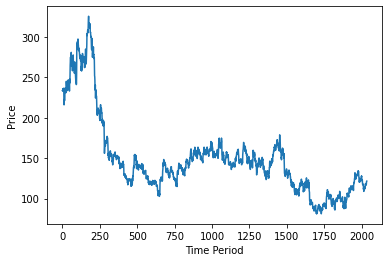

In [39]:
#checking how the close price has been varying
stock_data = stock_data['Close']
plt.plot(stock_data)
plt.xlabel('Time Period')
plt.ylabel('Price')

In [40]:
#since machines do not work well with large numbers, we need to scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
stock_data = scaler.fit_transform(np.array(stock_data).reshape(-1,1)) #reshape automatically determines the shape when -1 is indicated.
stock_data.shape

(2035, 1)

In [41]:
training_size = int(len(stock_data)*0.80)
test_size = len(stock_data)-training_size
train_data,test_data = stock_data[0:training_size,:],stock_data[training_size:len(stock_data),:1]
training_size,test_size

(1628, 407)

In [42]:
def create_dataset(dataset,time_step=1):
    data_X,data_Y = [],[]
    for i in range(len(dataset)-time_step-1):
      a= dataset[i:(i+time_step),0]
      data_X.append(a)
      data_Y.append(dataset[i+time_step,0])
    return np.array(data_X),np.array(data_Y)

In [43]:
time_step = 100
X_train,Y_train = create_dataset(train_data,time_step)
X_test,Y_test = create_dataset(test_data,time_step)

In [44]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1527, 100) (1527,) (306, 100) (306,)


In [45]:
#creating the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100


ValueError: ignored

In [51]:
import tensorflow as tf

In [52]:
#predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

ValueError: ignored

In [53]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

NameError: ignored

In [ ]:
#checking the performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

In [ ]:
#test data
math.sqrt(mean_squared_error(Y_test,test_predict))